In [1]:
# 데이터 탐색

# EDA(Exploratory Data Analysis 탐색적 데이터 분석)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] == 'MS Gothic'

False

In [4]:
path = 'csv_file/titanic.csv'

In [5]:
raw = pd.read_csv(path)

In [6]:
df = raw.copy()

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# 변수 타입 변환
df['Survived'] = df['Survived'].astype('str')
df['Pclass'] = df['Pclass'].astype('str')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
# groupby(), size()
group_pclass = df.groupby("Pclass") # 좌석등급별
group_pclass.size()

Pclass
1    216
2    184
3    491
dtype: int64

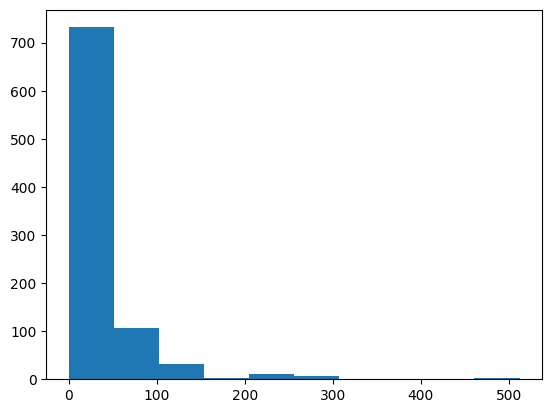

In [14]:
# 히스토그램
plt.hist(df['Fare'])
plt.show()

In [15]:
# 데이터 분리
df[df['Survived'] == '0']['Fare']

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [16]:
df[df['Survived'] == '0']['Pclass'].value_counts()

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [17]:
df[df['Survived'] == '1']['Fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

In [18]:
df[df['Survived'] == '1']['Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [19]:
data_0 = df[df['Survived'] == '0']['Fare'] # 사망자 요금 데이터
data_1 = df[df['Survived'] == '1']['Fare'] # 생존자 요금 데이터

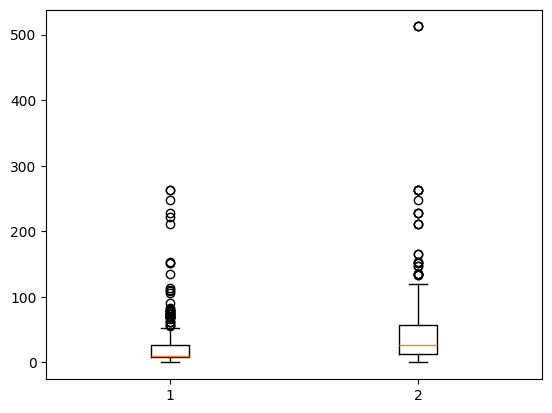

In [20]:
# 이상치, 결측치 확인

# boxplot
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

In [21]:
grouped_sex = df.groupby('Sex')
grouped_sex.size()

Sex
female    314
male      577
dtype: int64

In [22]:
# 성별(sex) 생존자 수
df[df['Sex'] == 'female'][:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [23]:
data_female = df[df['Sex'] == 'female']['Survived'] # 여성 생존자 데이터
pd.DataFrame(data_female).groupby('Survived').size()

Survived
0     81
1    233
dtype: int64

In [24]:
data_male = df[df['Sex'] == 'male']['Survived']
pd.DataFrame(data_male).groupby('Survived').size()

Survived
0    468
1    109
dtype: int64

## 예시

In [25]:
# 한국인, 일본인 각 성인 100명 육류 소비량 데이터 생성

np.random.randn(1000)  # 0~1 사이 가상의 데이터 1000개 생성

meat_consumption_kor = np.random.randn(1000) + 54
meat_consumption_jpn = np.random.randn(1000) + 32

In [26]:
# 데이터 프레임 생성
raw = pd.DataFrame({'한국인': meat_consumption_kor,
              '일본인': meat_consumption_jpn})

df = raw.copy()
df.head(3)

,한국인,일본인
0,52.309381,31.699643
1,53.664183,32.590076
2,55.070145,31.440806


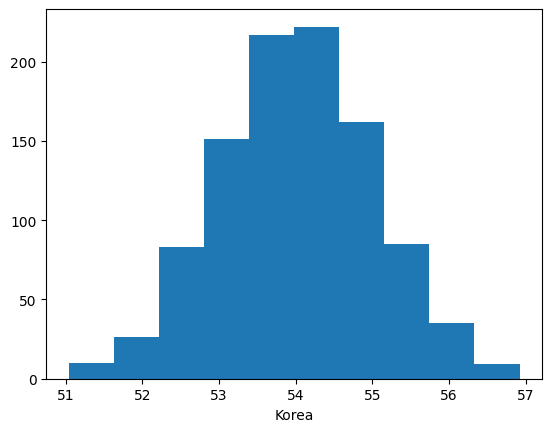

In [27]:
# 한국인 육류 소비량 히스토그램

plt.hist(meat_consumption_kor)
plt.xlabel('Korea')
plt.show()

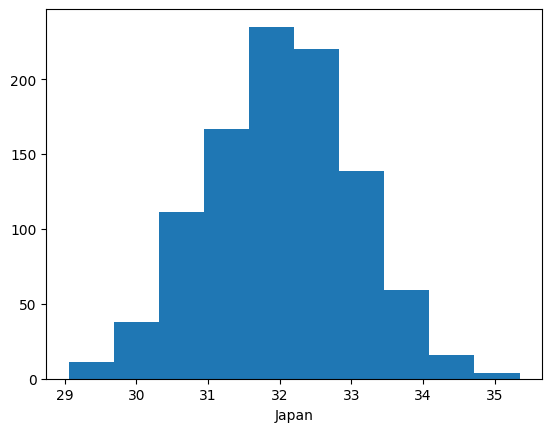

In [28]:
plt.hist(meat_consumption_jpn)
plt.xlabel('Japan')
plt.show()

In [29]:
# 표준 정규화 함수 zscore() 함수 이용
# 기존 데이터프레임 데이터에 새 열 생성(zscore 즉 데이터표준화 한 컬럼 추가)

import scipy.stats as ss
df['한국인정규화'] = ss.zscore(meat_consumption_kor)
df['일본인정규화'] = ss.zscore(meat_consumption_jpn)

In [30]:
df.head(3)

,한국인,일본인,한국인정규화,일본인정규화
0,52.309381,31.699643,-1.698938,-0.307959
1,53.664183,32.590076,-0.345098,0.554531
2,55.070145,31.440806,1.059865,-0.558673


In [31]:
# 표준정규화 수식 활용
# (x-x_bar) / sigma >> zscore
df['한국인정규화_수식']=\
(meat_consumption_kor - np.mean(meat_consumption_kor)) / np.std(meat_consumption_kor)
df['일본인정규화_수식']=\
(meat_consumption_jpn - np.mean(meat_consumption_jpn)) / np.std(meat_consumption_jpn)

In [32]:
df.head(3)

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673


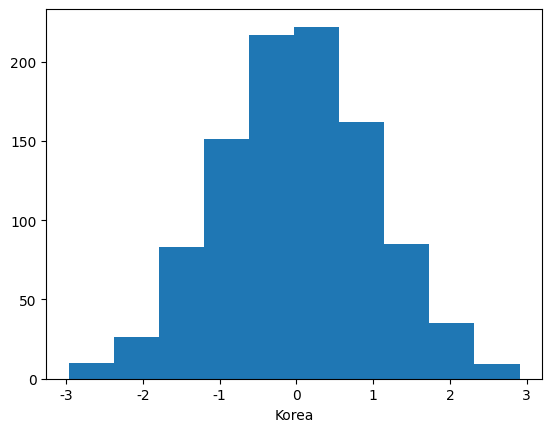

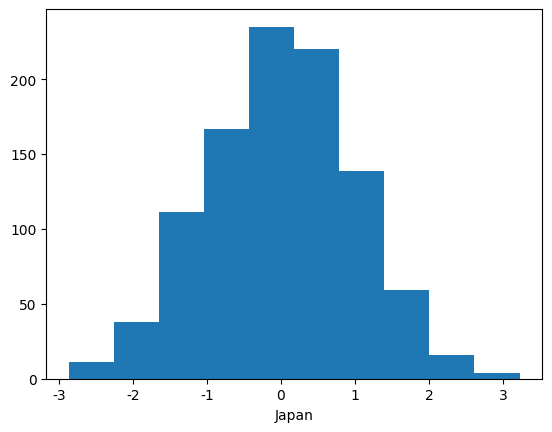

In [33]:
# 표준화된 데이터에 대한 히스토그램 그리기

plt.hist(df['한국인정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(df['일본인정규화'])
plt.xlabel('Japan')
plt.show()

In [34]:
# 사이킷런 스케일러 활용 정규화(*** 암기할 것)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['한국인정규화_사이킷런_표준화'] = scaler.fit_transform(df[['한국인']])  # 2차원 이여야 함.
df['일본인정규화_사이킷런_표준화'] = scaler.fit_transform(df[['일본인']])

In [35]:
df.head()

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식,한국인정규화_사이킷런_표준화,일본인정규화_사이킷런_표준화
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959,-1.698938,-0.307959
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531,-0.345098,0.554531
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673,1.059865,-0.558673
3,54.574175,31.124642,0.564248,-0.864916,0.564248,-0.864916,0.564248,-0.864916
4,54.427512,33.253019,0.417689,1.196670,0.417689,1.196670,0.417689,1.196670


In [36]:
df[['한국인']]

,한국인
0,52.309381
1,53.664183
2,55.070145
3,54.574175
4,54.427512
...,...
995,55.527904
996,56.430404
997,53.737387
998,53.580241


In [37]:
# 정규화 : min-max ( min : 0 , max : 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['한국인정규화_사이킷런_최소최대'] = scaler.fit_transform(df[['한국인']])  # 2차원 이여야 함.
df['일본인정규화_사이킷런_최소최대'] = scaler.fit_transform(df[['일본인']])

In [38]:
df.head(3)

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식,한국인정규화_사이킷런_표준화,일본인정규화_사이킷런_표준화,한국인정규화_사이킷런_최소최대,일본인정규화_사이킷런_최소최대
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959,-1.698938,-0.307959,0.215819,0.420247
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531,-0.345098,0.554531,0.446330,0.561776
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673,1.059865,-0.558673,0.685544,0.379106


In [39]:
min_ = np.min(meat_consumption_kor)
max_ = np.max(meat_consumption_kor)
df['한국인_수식_최대최소']= (df[['한국인']] - min_) / (max_ - min_)

min_ = np.min(meat_consumption_jpn)
max_ = np.max(meat_consumption_jpn)
df['일본인_수식_최대최소']= (df[['일본인']] - min_) / (max_ - min_)

df.head(3)

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식,한국인정규화_사이킷런_표준화,일본인정규화_사이킷런_표준화,한국인정규화_사이킷런_최소최대,일본인정규화_사이킷런_최소최대,한국인_수식_최대최소,일본인_수식_최대최소
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959,-1.698938,-0.307959,0.215819,0.420247,0.215819,0.420247
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531,-0.345098,0.554531,0.446330,0.561776,0.446330,0.561776
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673,1.059865,-0.558673,0.685544,0.379106,0.685544,0.379106


In [40]:
# USJudegeRatings.csv
path = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv'

In [41]:
raw  = pd.read_csv(path)

In [42]:
df = raw.copy()

In [43]:
df.head(3)

,rownames,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8


In [44]:
df.columns

Index(['rownames', 'CONT', 'INTG', 'DMNR', 'DILG', 'CFMG', 'DECI', 'PREP',
       'FAMI', 'ORAL', 'WRIT', 'PHYS', 'RTEN'],
      dtype='object')

In [45]:
import scipy.stats as ss

# 지정한 컬럼 왜도(skew) 계산
print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [53]:
(df['PHYS']+1)[:10]

0     9.3
1     9.5
2     8.9
3     9.8
4     6.5
5     9.6
6    10.1
7     7.8
8     9.8
9     9.5
Name: PHYS, dtype: float64

In [54]:
np.max(df['PHYS'] + 1)
# 모든 열의 값에 1 더한 후 최대값 구하기

10.1

In [ ]:
np.max(df['PHYS'] + 1) - df['PHYS']
# 원래 값이 클수록 결과 값이 작아지고, 원래 값이 작으면 결과 값은 커지는 효과.

In [55]:
np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

0     0.587787
1     0.470004
2     0.788457
3     0.262364
4     1.526056
5     0.405465
6     0.000000
7     1.193922
8     0.262364
9     0.470004
10    0.530628
11    1.163151
12    0.693147
13    1.360977
14    0.530628
15    0.741937
16    1.163151
17    0.693147
18    0.741937
19    1.064711
20    0.955511
21    0.993252
22    1.686399
23    0.832909
24    0.336472
25    0.095310
26    0.587787
27    0.262364
28    0.530628
29    0.182322
30    0.530628
31    0.693147
32    0.336472
33    0.262364
34    1.335001
35    0.741937
36    0.693147
37    0.470004
38    0.741937
39    0.693147
40    0.916291
41    0.587787
42    0.832909
Name: PHYS, dtype: float64

In [51]:
# 변수 변환 - 로그 변환

df['CONT_log'] = np.log(df['CONT'])
df['PHYS_log'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

# / log + 0.256887

print(df['CONT_log'])
print(df['PHYS_log'])

# 이 변환은 변수의 값들이 한쪽으로 치우쳐 있거나, 최대값 근처에 몰려있을때 사용.
# 값들을 역순으로 바꾸어 로그 변환을 적용한 것입니다.
# 이 변환을 통해 데이터의 분포를 더 균등하게 만들 수 있습니다.

# 결론적으로, 이러한 로그 변환은 데이터의 분포를 조정하고, 
# 모델의 성능을 향상시키기 위해 사용됩니다. 
# 데이터가 극단적인 값이나 비대칭적인 분포를 가질 때 특히 유용합니다.

0     1.740466
1     1.916923
2     1.974081
3     1.916923
4     1.987874
5     1.824549
6     2.360854
7     1.945910
8     1.987874
9     2.104134
10    1.945910
11    1.871802
12    1.902108
13    1.945910
14    1.871802
15    1.987874
16    2.079442
17    2.041220
18    2.116256
19    2.261763
20    1.960095
21    2.028148
22    1.887070
23    1.824549
24    2.014903
25    2.054124
26    1.960095
27    2.014903
28    2.014903
29    1.960095
30    1.887070
31    2.128232
32    1.931521
33    1.987874
34    2.041220
35    2.140066
36    1.931521
37    1.871802
38    2.116256
39    2.116256
40    2.197225
41    1.960095
42    2.151762
Name: CONT_log, dtype: float64
0     0.587787
1     0.470004
2     0.788457
3     0.262364
4     1.526056
5     0.405465
6     0.000000
7     1.193922
8     0.262364
9     0.470004
10    0.530628
11    1.163151
12    0.693147
13    1.360977
14    0.530628
15    0.741937
16    1.163151
17    0.693147
18    0.741937
19    1.064711
20    0.955511
21    0.9

In [56]:
# 왜도 계산

print(ss.skew(df['CONT_log']))
print(ss.skew(df['PHYS_log']))

0.6555571886692603
0.5824357748750443


### 아주 쉬운 예시

In [79]:
# 수학 점수(Math_score)

data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65],
        ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]

# print(data)

df = pd.DataFrame(data, columns = ['이름','수학점수'])
print(df)

print(np.mean(df['수학점수']))

   이름  수학점수
0  철수    52
1  영희    92
2  미영    84
3  시완    71
4  미경    65
5  영환    81
6  숙경    66
7  부영    77
8  민섭    73
9  보연    74
73.5


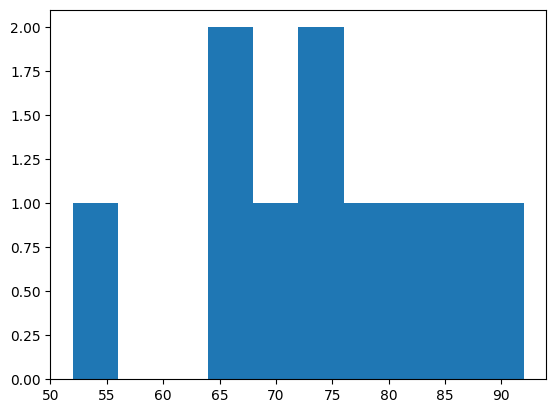

In [80]:
plt.hist(df['수학점수'])
plt.show()

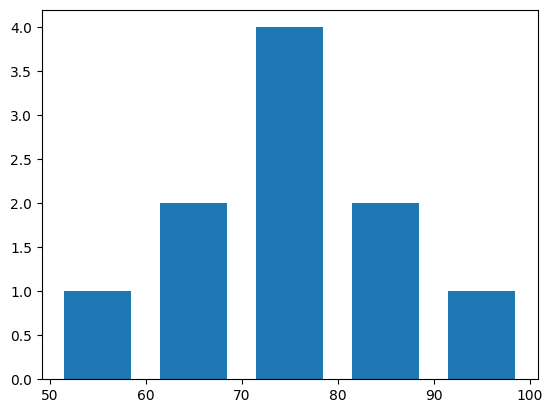

In [81]:
# 히스토그램 (범위 50 ~ 100, 5개 구간)
plt.hist(df['수학점수'], bins=5, range=[50,100], rwidth=0.7)
# rwidth(그래프 폭 조절하는 기능, 생략시 default = 1)
plt.show()

In [82]:
df.head()

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65


In [83]:
df.loc[df['수학점수'] < 60 , '등급']  = 'F'
df.loc[(df['수학점수'] >= 60) & (df['수학점수'] < 70 ),'등급']  = 'D'
df.loc[(df['수학점수'] >= 70) & (df['수학점수'] < 80 ),'등급']  = 'C'
df.loc[(df['수학점수'] >= 80) & (df['수학점수'] < 90 ),'등급']  = 'B'
df.loc[(df['수학점수'] >= 90) & (df['수학점수'] <= 100 ),'등급']  = 'A'

In [84]:
df.head()

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D


In [85]:
# CUT
df['등급_cut'] = pd.cut(x=df['수학점수'], bins=[0,60,70,80,90,100], 
                  labels = ['F','D','C','B','A'],
                  include_lowest=True)

In [86]:
df.head()

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D


In [87]:
# Qcut
df['등급_QCUT'] = pd.qcut(x=df['수학점수'],
                        q=5, 
                        labels = ['F','D','C','B','A'])

In [88]:
df.head()

,이름,수학점수,등급,등급_cut,등급_QCUT
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F


### 차원축소 : PCA(Principal Component Analysis, 주성분분석)

In [90]:
raw = pd.read_csv('csv_file/iris.csv')

In [91]:
iris = raw.copy()

In [94]:
# 연속형 변수와 범주형 변수 분리
df = iris.drop(['species'], axis=1)
df_species = iris[['species']]

In [95]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
df_species

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [99]:
# 변수 정규화
# 
from sklearn.preprocessing import StandardScaler

df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])

df['petal_length'] = StandardScaler().fit_transform(df[['petal_length']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])

In [104]:
# PCA 수행
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

p_score = pca.fit_transform(df)
print(p_score)
print(p_score.shape)

[[-2.26470281e+00  4.80026597e-01 -1.27706022e-01 -2.41682039e-02]
 [-2.08096115e+00 -6.74133557e-01 -2.34608854e-01 -1.03006775e-01]
 [-2.36422905e+00 -3.41908024e-01  4.42014848e-02 -2.83770534e-02]
 [-2.29938422e+00 -5.97394508e-01  9.12901063e-02  6.59555596e-02]
 [-2.38984217e+00  6.46835383e-01  1.57381957e-02  3.59228133e-02]
 [-2.07563095e+00  1.48917752e+00  2.69682944e-02 -6.60818022e-03]
 [-2.44402884e+00  4.76441976e-02  3.35470401e-01  3.67755572e-02]
 [-2.23284716e+00  2.23148073e-01 -8.86954979e-02  2.46120962e-02]
 [-2.33464048e+00 -1.11532768e+00  1.45076864e-01  2.68592208e-02]
 [-2.18432817e+00 -4.69013561e-01 -2.53765567e-01  3.98992877e-02]
 [-2.16631010e+00  1.04369065e+00 -2.68681102e-01 -1.67313672e-02]
 [-2.32613087e+00  1.33078335e-01  9.37592444e-02  1.33483413e-01]
 [-2.21845090e+00 -7.28676165e-01 -2.30911237e-01 -2.42503814e-03]
 [-2.63310070e+00 -9.61506729e-01  1.80796084e-01  1.92155336e-02]
 [-2.19874060e+00  1.86005711e+00 -4.72900998e-01 -1.94731769e

In [105]:
print(pca.explained_variance_ratio_)
# 결과해석
# 주요인 pca1, pca2
# pca1은 가장 주요한 요인으로 전체 데이터의 72.96% 설명함
# pca는 두번째 주요인으로 전체 데이터의 22.85% 설명함

# 주요인 pca1, pca2 로 설명한 데이터는 95.81%
# 0.72962445 + 0.22850762 = 0.95813207

[0.72962445 0.22850762 0.03668922 0.00517871]


In [111]:
# PCA 수행
from sklearn.decomposition import PCA

pca_2 = PCA(n_components = 2)

p_score_2 = pca_2.fit_transform(df)
print(p_score_2)
print(p_score_2.shape)
print(pca_2.explained_variance_ratio_)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

### 결측치 처리

In [115]:
raw = pd.read_csv('csv_file/titanic.csv')
df = raw.copy()

In [117]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
# 결측치가 있는 모든 행 제거
df_row = df.dropna(axis=0)

In [121]:
df_row.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [122]:
df_row.isnull().sum().sum()

0

In [123]:
df_row.shape

(183, 12)

In [125]:
df['Age'].dtype

dtype('float64')

In [127]:
# 단순 대치 : 평균
df['Age'].isnull().sum() # Age컬럼 결측치 개수

177

In [126]:
age_mean = df['Age'].mean() # Age 평균
print(age_mean)

29.69911764705882


In [128]:
df['Age'].fillna(age_mean, inplace=True)

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_31536\1439936708.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean, inplace=True)


In [129]:
df['Age'].isnull().sum() # 평균값 대체 후 ,age 컬럼 결측치 개수

0

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
# 단순대치법 : 최빈값 (mode) 대체

from scipy.stats import mode

df['Embarked'].isnull().sum()

2

In [134]:
embarked_mode = df['Embarked'].mode() # 최빈값이 나옴

In [135]:
embarked_mode[0]

'S'

In [138]:
# df['Embarked'].fillna(0)

In [139]:
df['Embarked'].fillna(method='ffill', inplace=True)

C:\Users\taeyoung\AppData\Local\Temp\ipykernel_31536\2170384249.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method='ffill', inplace=True)


In [136]:
# df['Embarked']의 결측치를 '최빈값' 대체

# df['Embarked'].fillna(embarked_mode[0], inplace = True)
df['Embarked'].isnull().sum()

0

In [140]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
# 성별 평균 연령 구하기

df.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [145]:
# 좌석등급별 평균 연령 구하기
df.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [146]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
# transform('mean') : 
#  그룹별로 계산된 값을 원래 데이터프레임의 index와 동일한 크기로 반환

In [148]:
df[['Pclass', 'Age']]

,Pclass,Age
0,3,22.000000
1,1,38.000000
2,3,26.000000
3,1,35.000000
4,3,35.000000
...,...,...
886,2,27.000000
887,1,19.000000
888,3,29.699118
889,1,26.000000


### 이상치(Outliers) 처리

In [149]:
# 정규분포
# 평균 50, 표준편차(std) : 10 인 데이터 200개 생성

data = 10 * np.random.randn(200) + 50
data[:10]

array([68.75865298, 59.28380397, 58.17580218, 59.90213723, 41.49051995,
       75.55760696, 42.18577754, 44.43128378, 51.74070423, 50.72817675])

In [151]:
df = pd.DataFrame({"값": data})

In [152]:
# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

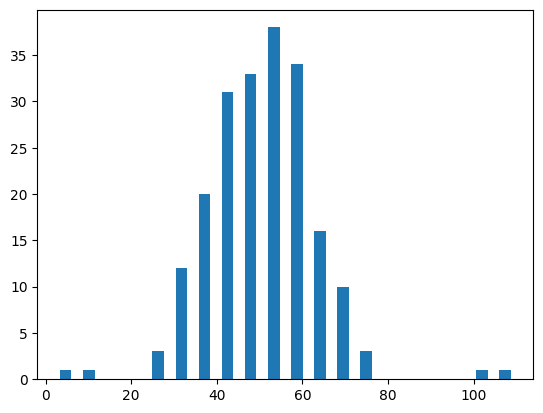

In [158]:
# 분포 시각화
plt.hist(df['값'], bins=20, rwidth=0.5)
plt.show()

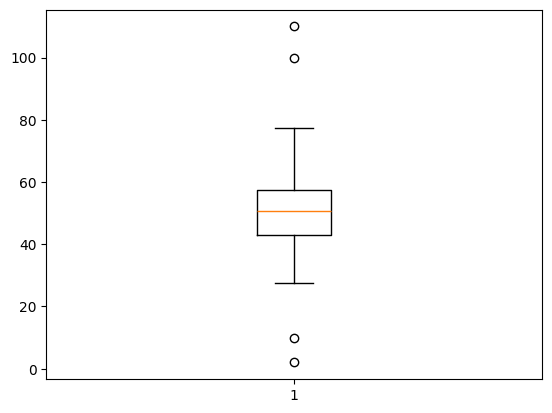

In [156]:
plt.boxplot(df['값'])
plt.show()

In [165]:
Q1 = df['값'].quantile(.25)
Q2 = df['값'].quantile(.50)
Q3 = df['값'].quantile(.75)

IQR = Q3 - Q1

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("IQR = ", IQR)


Q1 =  42.85262638299625
Q2 =  50.81328233530721
Q3 =  57.41978559563141
IQR =  14.567159212635161


In [166]:
Q1 = df['값'].describe()["25%"]
Q2 = df['값'].describe()["50%"]
Q3 = df['값'].describe()["75%"]

IQR = Q3 - Q1

print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("Q3 = ", Q3)
print("IQR = ", IQR)

Q1 =  42.85262638299625
Q2 =  50.81328233530721
Q3 =  57.41978559563141
IQR =  14.567159212635161


In [170]:
df_desc = df.describe()
df_desc.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [176]:
df_desc.loc['25%', :]

값    42.852626
Name: 25%, dtype: float64

In [184]:
# 상한 경계 
condition = df['값'] > (Q3 + IQR * 1.5)
df[condition]
upper_outlier = df[condition]
print(upper_outlier)

         값
202  100.0
204  110.0


In [185]:
# 하한 경계
condition = df['값'] < (Q1 - IQR * 1.5)
df[condition]
upper_outlier = df[condition]
print(upper_outlier)

        값
201   2.0
203  10.0


### 평활화(Smoothing)

In [187]:
# 평활하는 데이터 분포를 매끄럽게 
# 만들어 줘서 데이터에서 중요하지 않은 것(잡음 등)을 제거 >> 패턴 분석 방법
# 이동평균(MA : Moving Average)

In [188]:
path = 'csv_file/lynx.csv'

In [191]:
raw = pd.read_csv(path)
df = raw.copy()

In [192]:
df.describe()

,Unnamed: 0,time,value
count,114.000000,114.000000,114.000000
mean,57.500000,1877.500000,1538.017544
std,33.052988,33.052988,1585.843914
min,1.000000,1821.000000,39.000000
25%,29.250000,1849.250000,348.250000
50%,57.500000,1877.500000,771.000000
75%,85.750000,1905.750000,2566.750000
max,114.000000,1934.000000,6991.000000


In [194]:
# 단순 이동 평균 (10년)
df['value'][:10]

0     269
1     321
2     585
3     871
4    1475
5    2821
6    3928
7    5943
8    4950
9    2577
Name: value, dtype: int64

In [199]:
df['value'].rolling(10).mean()[:10]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    2374.0
Name: value, dtype: float64

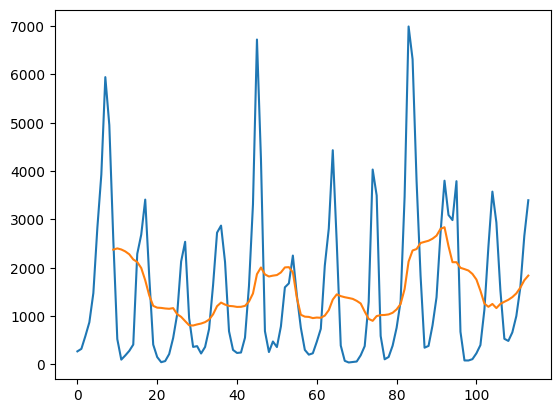

In [201]:
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])

plt.show()

In [204]:
# 지수 가중 이동평균 (10년)
df['value'].ewm(10).mean()

0       269.000000
1       296.238095
2       401.797583
3       536.360914
4       761.461483
          ...     
109    1487.443285
110    1443.129132
111    1456.481338
112    1565.621692
113    1732.022900
Name: value, Length: 114, dtype: float64

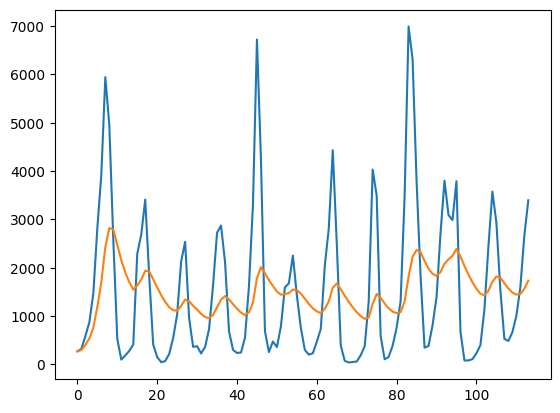

In [203]:
# ewm은 pandas 라이브러리에서 
# 지수 가중 이동 평균(Exponentially Weighted Moving Average, EWMA)을 계산할 때 사용하는 메서드
df['ewm'] = df['value'].ewm(10).mean()   #ewm 스무딩효과

plt.plot(df['value'])
plt.plot(df['ewm'])

plt.show()